# k-coloring analysis


In [15]:
import mlrose
import numpy as np
import pandas as pd
from time import time
import os
from tqdm import tqdm

from itertools import product
from matplotlib import pyplot as plt

In [16]:
def imax(l):
    pos = 0
    max_val = 0
    for i in range(len(l)) :
        if l[i] > max_val :
            pos = i
            max_val = l[i]
    return(max_val, i)

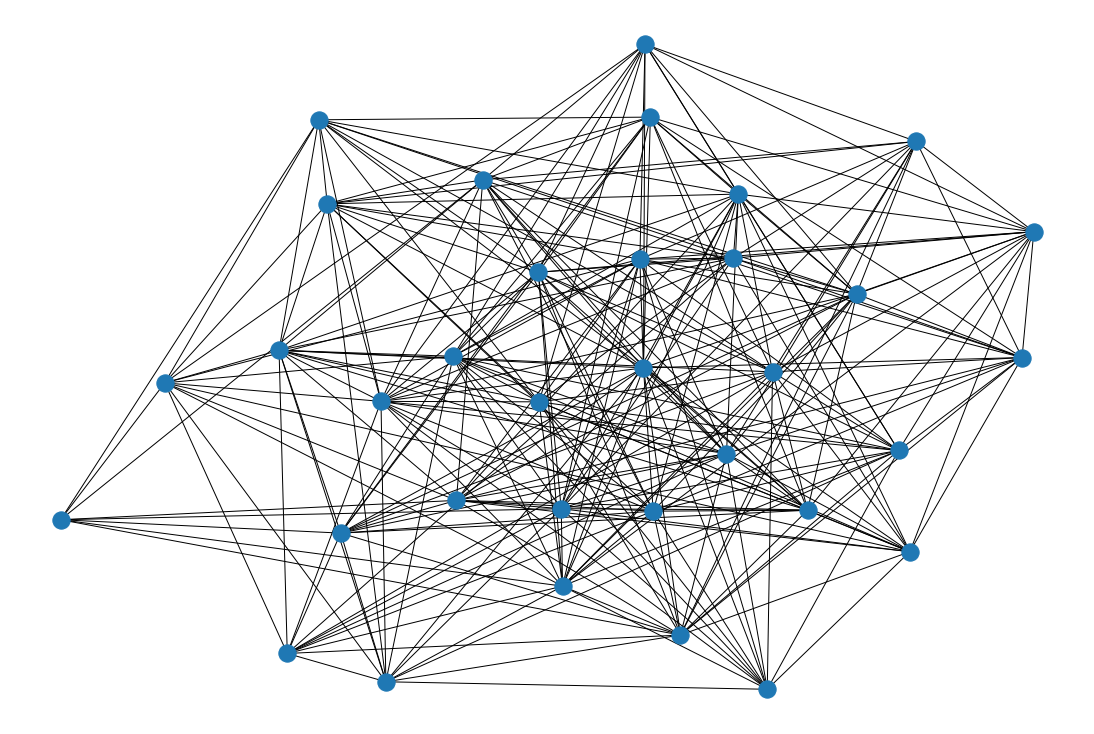

In [281]:
import networkx as nx
G=nx.Graph()

vertex = range(1,35)
G.add_nodes_from(vertex)


# Erdos Renyi graph
p = 0.30
edges=[]
for i in vertex :
    for j in vertex :
        if np.random.random()< p and i != j:
            if (j,i) not in edges :
                edges.append((i,j))
G.add_edges_from(edges)

nx.draw(G)
plt.savefig("simple_path.png") # save as png
plt.show() # display


In [163]:
edges

[(1, 8),
 (1, 9),
 (1, 17),
 (1, 20),
 (1, 29),
 (2, 3),
 (2, 11),
 (2, 12),
 (2, 14),
 (2, 16),
 (2, 17),
 (2, 24),
 (2, 27),
 (2, 28),
 (3, 6),
 (3, 9),
 (3, 14),
 (3, 28),
 (4, 2),
 (4, 10),
 (4, 25),
 (5, 3),
 (5, 4),
 (5, 8),
 (5, 11),
 (5, 14),
 (5, 15),
 (5, 21),
 (6, 15),
 (6, 17),
 (6, 23),
 (6, 28),
 (7, 3),
 (7, 12),
 (7, 13),
 (7, 14),
 (7, 15),
 (7, 28),
 (8, 4),
 (8, 23),
 (9, 7),
 (9, 10),
 (9, 11),
 (9, 12),
 (9, 17),
 (9, 18),
 (9, 20),
 (9, 23),
 (9, 26),
 (10, 20),
 (10, 27),
 (10, 29),
 (11, 10),
 (11, 12),
 (11, 13),
 (11, 17),
 (11, 19),
 (12, 1),
 (12, 6),
 (12, 8),
 (12, 14),
 (12, 16),
 (12, 19),
 (12, 22),
 (12, 29),
 (13, 14),
 (13, 22),
 (13, 27),
 (14, 9),
 (14, 18),
 (15, 19),
 (15, 21),
 (15, 22),
 (15, 23),
 (15, 24),
 (15, 25),
 (15, 28),
 (16, 13),
 (16, 18),
 (16, 20),
 (16, 27),
 (17, 7),
 (17, 15),
 (17, 18),
 (17, 23),
 (17, 28),
 (18, 28),
 (19, 1),
 (19, 2),
 (19, 6),
 (19, 20),
 (19, 23),
 (19, 24),
 (19, 29),
 (20, 2),
 (20, 7),
 (20, 18),
 (21

In [215]:
## Saving parameters
dir_="results/plot/"

results_dir='./results'
plot_dir='./data/plot'

if not os.path.exists(dir_):
    os.makedirs(dir_)

    
    
max_iter_list=[10, 20, 50,100,200]
state_size = 50

nb_restarts_list=[5,10,15,20,25,30,35,40,45,50]

In [45]:


## Hill climbing

hill_climb_best_state=[]
hill_climb_best_fit=[]
hill_climb_curve=[]
hill_climb_time=[]
threshold_param_list=range(0,10)
print("Random Hill Climbing")

for threshold, nb_restarts in tqdm(product(threshold_param_list,nb_restarts_list)):
        for iters in max_iter_list:
            fn=mlrose.MaxKColor(edges)
            state=np.random.randint(0,2,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn)
            start=time()
            best_state, best_fitness, curve = mlrose.random_hill_climb(problem_fit, 
                                                                   restarts=nb_restarts,
                                                                   max_attempts = 500, 
                                                                   max_iters=int(iters), curve=True)
            end=time()
            hill_climb_time.append(end-start)
            hill_climb_best_state.append(best_state)
            hill_climb_best_fit.append(best_fitness)
            hill_climb_curve.append(curve)


0it [00:00, ?it/s]

Random Hill Climbing


38it [01:34,  2.97s/it]

KeyboardInterrupt: 

In [ ]:
plt.plot(hill_climb_best_fit)

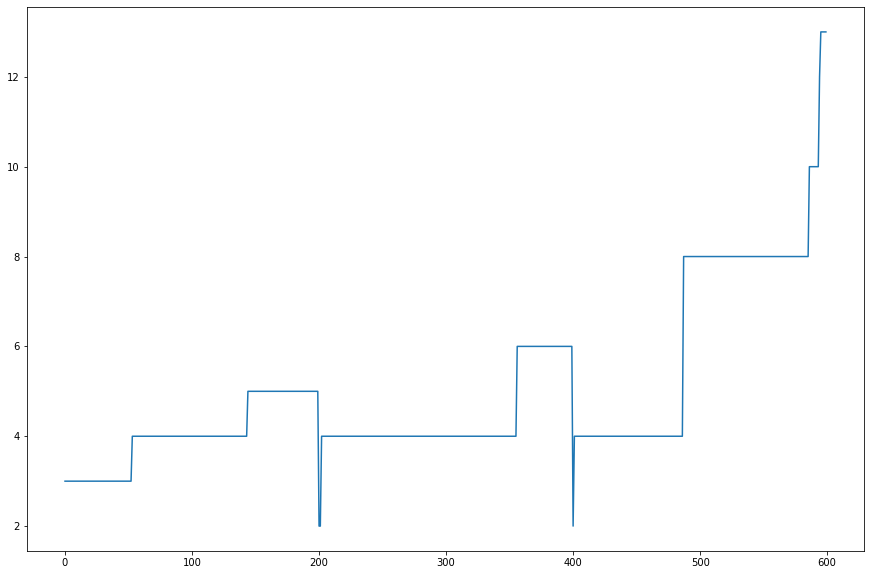

In [341]:
plt.plot(curve)

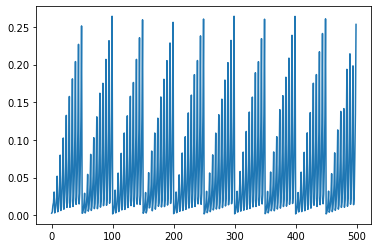

In [28]:
plt.plot(hill_climb_time)

In [336]:
## Hill climbing

nb_restarts_list=[10,50,100,200]
hill_climb_best_state=[]
hill_climb_best_fit=[]
hill_climb_curve=[]
hill_climb_time=[]
threshold_param_list=[0.5]
print("Random Hill Climbing")

for threshold, nb_restarts in tqdm(list(
    product(threshold_param_list,nb_restarts_list))):
        for iters in max_iter_list:
            fn=mlrose.FourPeaks(t_pct=threshold/10)
            state=np.random.randint(0,2,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn)
            start=time()
            best_state, best_fitness, curve = mlrose.random_hill_climb(problem_fit, 
                                                                   restarts=nb_restarts,
                                                                   max_attempts = 500, 
                                                                   max_iters=int(iters), curve=True)
            end=time()
            hill_climb_time.append(end-start)
            hill_climb_best_state.append(best_state)
            hill_climb_best_fit.append(best_fitness)
            hill_climb_curve.append(curve)



  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:00,  8.53it/s]

Random Hill Climbing




 50%|█████     | 2/4 [00:00<00:00,  4.47it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.32it/s]

100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


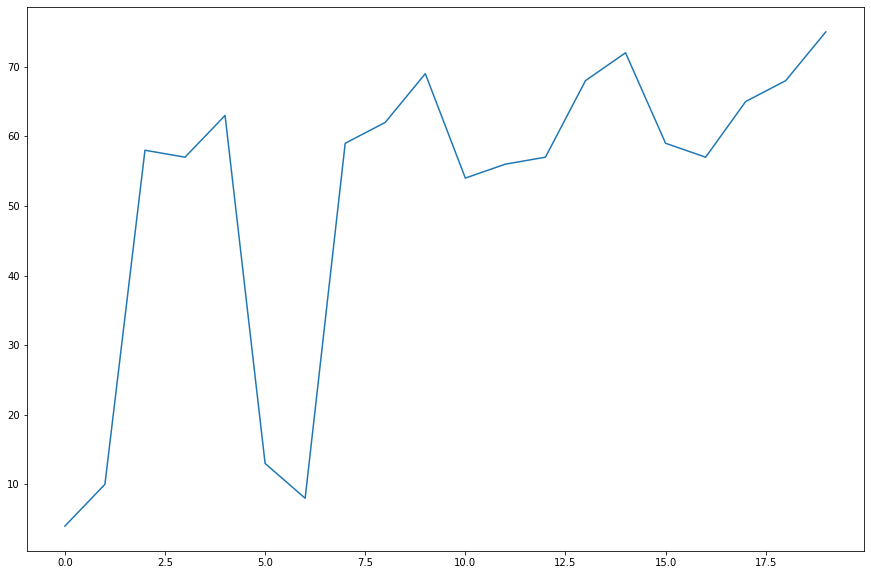

In [337]:
plt.plot(hill_climb_best_fit)
# plot time on the same axis

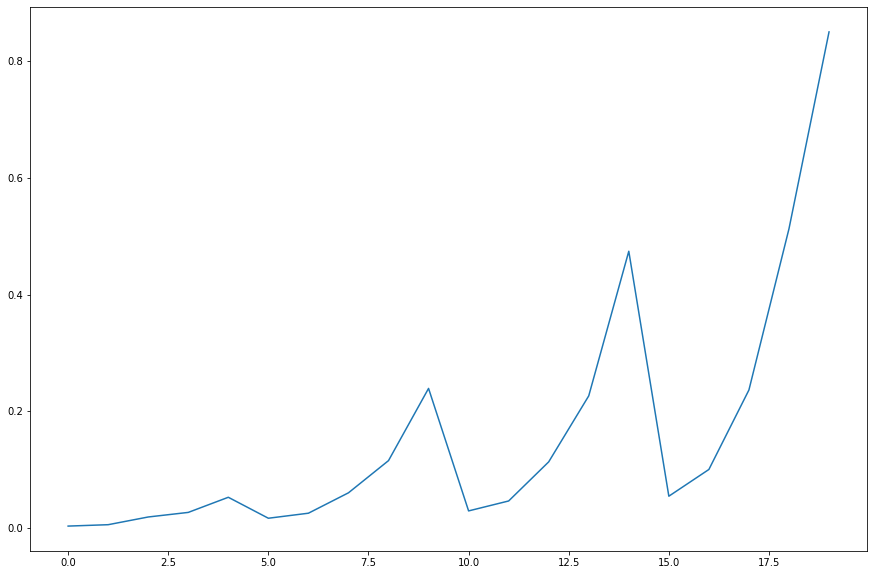

In [380]:
plt.plot(hill_climb_time)

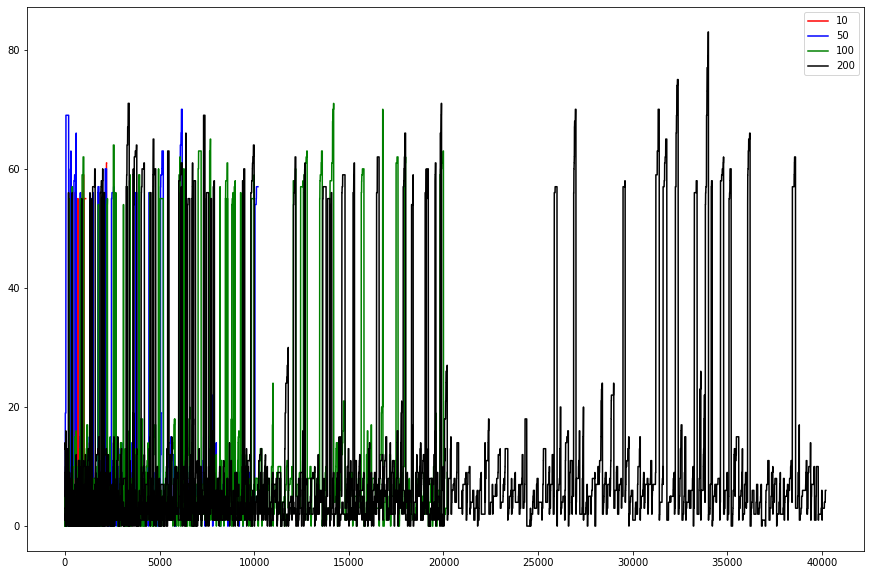

In [198]:
plt.rcParams["figure.figsize"] = (15,10)
color_list = ['red','blue', 'green','black']
no_duplicate = []
l= list(
    product(threshold_param_list,nb_restarts_list))
for i in range(len(hill_climb_curve)) :
    c = 0
    while l[int(i/len(max_iter_list))][1] != nb_restarts_list[c] :
        c+=1
    color = c/len(population_list)
    if c not in no_duplicate :
        plt.plot(hill_climb_curve[i], color = color_list[c], label=str(population_list[c]))
        no_duplicate.append(c)
    else : 
        plt.plot(hill_climb_curve[i], color = color_list[c])        
    
plt.legend()

# Results

In [200]:
result, i = imax(hill_climb_best_fit)

print("The best value found is ", result, " with state ",hill_climb_best_state[i])
print("The time required to find this result was ",hill_climb_time[i], "s")

The best value found is  83.0  with state  [1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
The time required to find this result was  0.849951982498169 s


In [288]:
## Standart testing
n_iteration = 10
durations = []
score = []
for i in (range(n_iteration)) :
            fn=mlrose.MaxKColor(edges)
            state=np.random.randint(0,2,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn, max_val=3, maximize=False)
            start=time()
            best_state, best_fitness = mlrose.random_hill_climb(problem_fit, 
                                                                   restarts=50,
                                                                   max_attempts = 100, 
                                                                   max_iters=140)
            end=time()
            durations.append(end-start)
            score.append(best_fitness)
print("Average score : ", np.mean(score))
print("Average time :  ", np.mean(durations))



Average score :  51.9
Average time :   1.046983814239502


In [289]:
hil_score = score
print(best_state)

[0 2 2 1 2 2 0 0 1 2 2 0 2 0 0 1 1 1 2 1 1 0 1 2 0 1 2 1 1 2 0 0 0 0 2 1 2
 2 1 2 2 1 1 2 0 0 0 1 2 2]


## Genetic Algorithm

In [82]:
## Genetic Algorithm
population_list=[10,50, 100, 200]
mutation_probability_list=np.linspace(0.1,0.5,5)
genetic_best_state_list=[]
genetic_best_fit_list=[]
genetic_curve=[]
genetic_time=[]

In [52]:

for threshold, pops, pr in tqdm(list(product(threshold_param_list,population_list,mutation_probability_list))):
    for iters in (max_iter_list):
        fn=mlrose.FourPeaks(t_pct=threshold/10)
        state=np.random.randint(0,2,size=state_size)
        problem_fit=mlrose.DiscreteOpt(state_size, fn)
        
        start=time()
        best_state, best_fitness, curve = mlrose.genetic_alg(problem_fit,
                                                               mutation_prob = pr,
                                                               max_attempts = 500,
                                                               pop_size=pops,
                                                               max_iters=int(iters),
                                                               curve=True)
        end=time()
        genetic_time.append(end-start)
        genetic_best_state_list.append(best_state)
        genetic_best_fit_list.append(best_fitness)
        genetic_curve.append(curve)


NameError: name 'population_list' is not defined

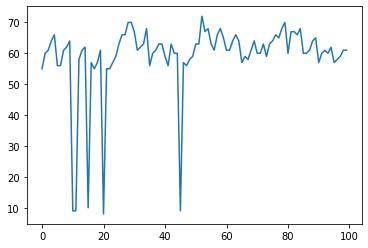

In [84]:
plt.plot(genetic_best_fit_list)

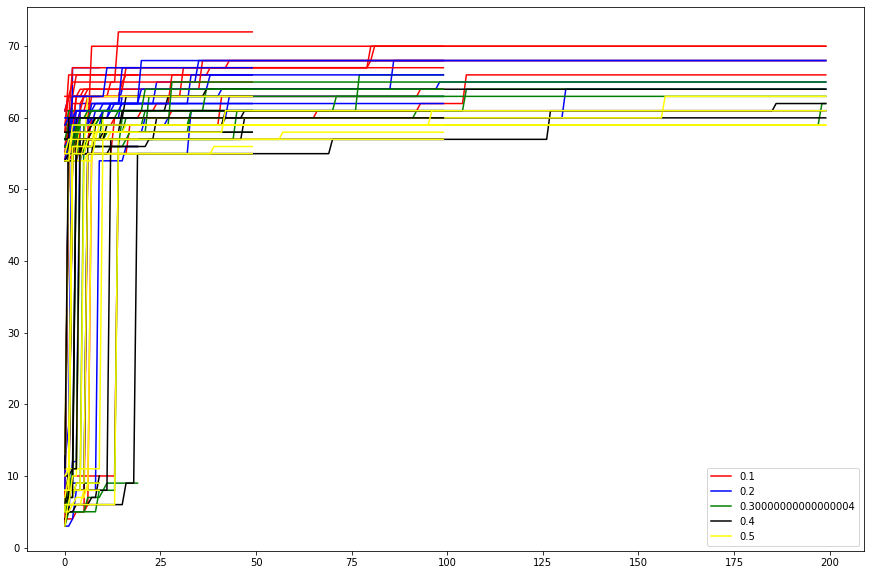

In [234]:
plt.rcParams["figure.figsize"] = (15,10)
color_list = ['red','blue', 'green','black','yellow']
no_duplicate = []
l= list(product(threshold_param_list,population_list,mutation_probability_list))
for i in range(len(genetic_curve)) :
    c = 0
    while l[int(i/len(max_iter_list))][2] != mutation_probability_list[c] :
        c+=1
    color = c/len(mutation_probability_list)
    if c not in no_duplicate :
        plt.plot(genetic_curve[i], color = color_list[c], label=str(mutation_probability_list[c]))
        no_duplicate.append(c)
    else : 
        plt.plot(genetic_curve[i], color = color_list[c])        
    
plt.legend()

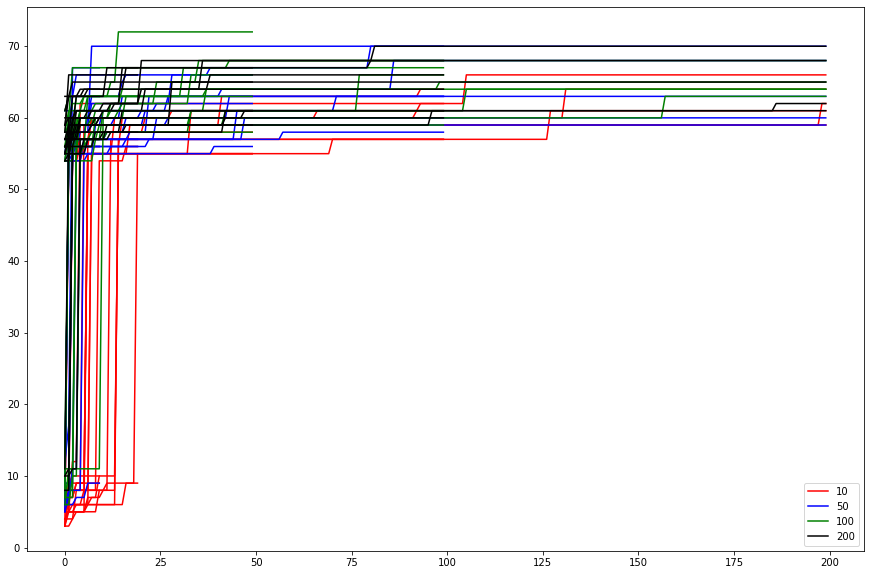

In [135]:
plt.rcParams["figure.figsize"] = (15,10)
color_list = ['red','blue', 'green','black']
no_duplicate = []
l= list(product(threshold_param_list,population_list,mutation_probability_list))
for i in range(len(genetic_curve)) :
    c = 0
    while l[int(i/len(max_iter_list))][1] != population_list[c] :
        c+=1
    color = c/len(population_list)
    if c not in no_duplicate :
        plt.plot(genetic_curve[i], color = color_list[c], label=str(population_list[c]))
        no_duplicate.append(c)
    else : 
        plt.plot(genetic_curve[i], color = color_list[c])        
    
plt.legend()

In [286]:
## Standart testing
n_iteration = 10
durations = []
score = []
for i in (range(n_iteration)) :
            fn=mlrose.MaxKColor(edges)
            state=np.random.randint(0,2,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn, max_val=3, maximize=False)
            start=time()
            best_state, best_fitness = mlrose.genetic_alg(problem_fit,
                                                               mutation_prob = 0.1,
                                                               max_attempts = 50,
                                                               pop_size=100,
                                                               max_iters=50)
            end=time()
            durations.append(end-start)
            score.append(best_fitness)
print("Average score : ", np.mean(score))
print("Average time :  ", np.mean(durations))

Average score :  65.6
Average time :   1.2212216138839722


In [287]:
ga_score = score

In [376]:
print("Simulated Annealing")

annealing_best_state=[]
annealing_best_fit=[]
annealing_curve=[]
annealingtime=[]
decay_list = [0.99, 0.995, 0.998]
max_iter_list=[500,1000,2000]
threshold_param_list = [0.1]


Simulated Annealing


In [377]:
for threshold, iters, decay in tqdm(list(product(threshold_param_list,max_iter_list, decay_list))):
            fn=mlrose.FourPeaks(t_pct=threshold/10)
            state=np.random.randint(0,2,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn)
            start=time()
            best_state, best_fitness, curve = mlrose.simulated_annealing(problem_fit,
                                                                           max_attempts = 1000, 
                                                                           max_iters=int(iters),
                                                                           curve=True, 
                                                                           schedule=mlrose.GeomDecay(init_temp=1.0, decay=decay, min_temp=0.001))
           
            end=time()
            annealingtime.append(end-start)
            annealing_best_state.append(best_state)
            annealing_best_fit.append(best_fitness)
            annealing_curve.append(curve)
    










  0%|          | 0/9 [00:00<?, ?it/s]/usr/local/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)









 44%|████▍     | 4/9 [00:00<00:00, 39.74it/s]








 78%|███████▊  | 7/9 [00:00<00:00, 30.44it/s]








100%|██████████| 9/9 [00:00<00:00, 21.72it/s]


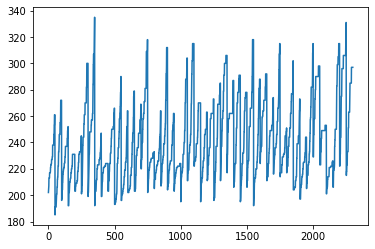

In [49]:
plt.plot(annealing_best_fit)

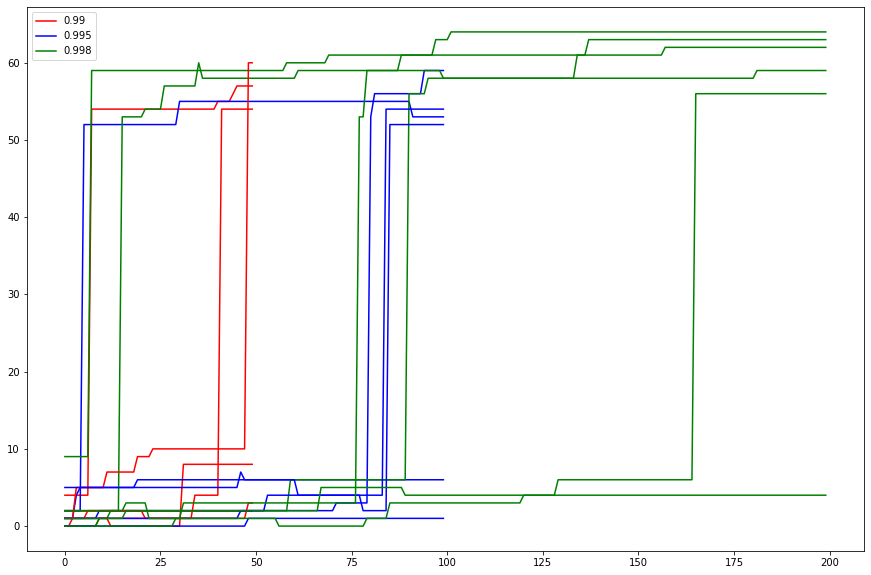

In [375]:
plt.rcParams["figure.figsize"] = (15,10)
color_list = ['red','blue', 'green','black']
no_duplicate = []
l= list(product(threshold_param_list,max_iter_list, decay_list))
for i in range(len(annealing_curve)) :
    c = 0
    while l[int(i/len(max_iter_list))][2] != decay_list[c] :
        c+=1
    color = c/len(population_list)
    if c not in no_duplicate :
        plt.plot(annealing_curve[i], color = color_list[c], label=str(decay_list[c]))
        no_duplicate.append(c)
    else : 
        plt.plot(annealing_curve[i], color = color_list[c])        
    
plt.legend()

In [333]:
## Standart testing
n_iteration = 10
durations = []
score = []
for i in (range(n_iteration)) :
            fn=mlrose.MaxKColor(edges)
            state=np.random.randint(0,1,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn, max_val=3, maximize=False)
            start=time()
            best_state, best_fitness = mlrose.simulated_annealing(problem_fit,
                                                            max_attempts = 500, 
                                                            max_iters=2000,
                                                            schedule=mlrose.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))
            end=time()
            durations.append(end-start)
            score.append(best_fitness)
print("Average score : ", np.mean(score))
print("Average time :  ", np.mean(durations))

Average score :  48.6
Average time :   0.3741934776306152


In [334]:
ann_score = score

# MIMIC

In [253]:
keep_list=np.linspace(0.1,.2,5)
mimic_best_state=[]
mimic_best_fit=[]
mimic_curve=[]
mimic_time=[]
print("Mimic")
threshold_param_list = [1]

Mimic


In [256]:
for threshold, keep_param in tqdm(list(product(threshold_param_list,keep_list))):
            fn=mlrose.MaxKColor(edges)
            state=np.random.randint(0,1,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn, max_val=3, maximize=False)
            start=time()
            best_state, best_fitness, curve = mlrose.mimic(problem_fit, 
                                                                   keep_pct=keep_param,
                                                                   max_attempts = 50, 
                                                                   max_iters=10, curve=True)
            end=time()
            mimic_time.append(end-start)
            mimic_best_state.append(best_state)
            mimic_best_fit.append(best_fitness)
            mimic_curve.append(curve)    



  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:09<00:37,  9.33s/it]

 40%|████      | 2/5 [00:18<00:27,  9.27s/it]

 60%|██████    | 3/5 [00:27<00:18,  9.15s/it]

 80%|████████  | 4/5 [00:36<00:09,  9.08s/it]

100%|██████████| 5/5 [00:45<00:00,  9.09s/it]


IndexError: list index out of range

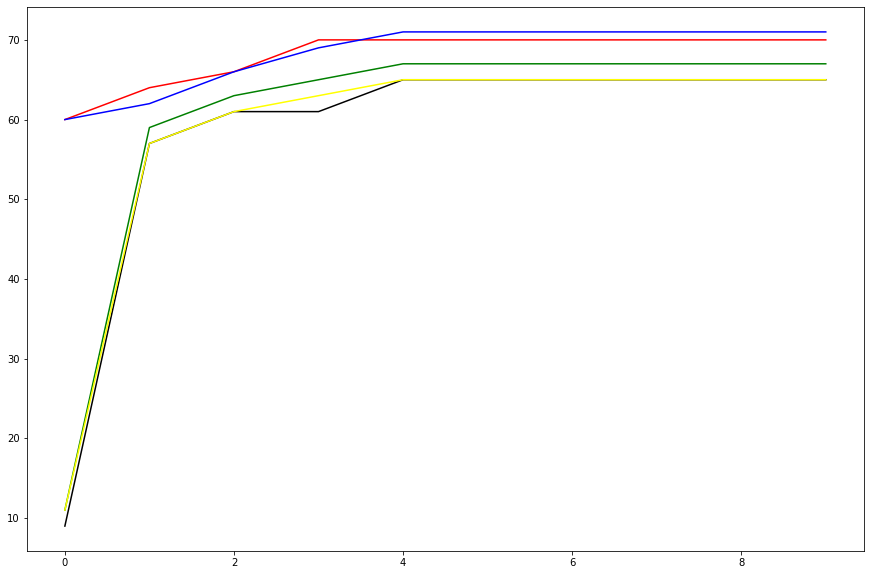

In [259]:
plt.rcParams["figure.figsize"] = (15,10)
color_list = ['red','blue', 'green','black', 'yellow']
no_duplicate = []
l= list(product(threshold_param_list,keep_list))
for i in range(len(mimic_curve)) :
    c = 0
    while l[int(i/len(threshold_param_list))][1] != keep_list[c] :
        c+=1
    color = c
    if c not in no_duplicate :
        plt.plot(mimic_curve[i],
                 color = color_list[c],
                 label=str(keep_list[c]))
        no_duplicate.append(c)
    else : 
        plt.plot(mimic_curve[i], color = color_list[c])        
    
plt.legend()

In [282]:
## Standart testing for MIMIC
n_iteration = 1
durations = []
score = []
for i in (range(n_iteration)) :
            fn=mlrose.MaxKColor(edges)
            state=np.random.randint(0,1,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn, max_val=3, maximize=False)
            start=time()
            best_state, best_fitness, curve = mlrose.mimic(problem_fit, 
                                                                   keep_pct=0.2,
                                                                   max_attempts = 40, 
                                                                   max_iters=20, curve=True)
            end=time()
            durations.append(end-start)
            score.append(best_fitness)
print("Average score : ", np.mean(score))
print("Average time :  ", np.mean(durations))

Average score :  50.0
Average time :   19.22355008125305


In [285]:
mim_score = score

BoxPlot


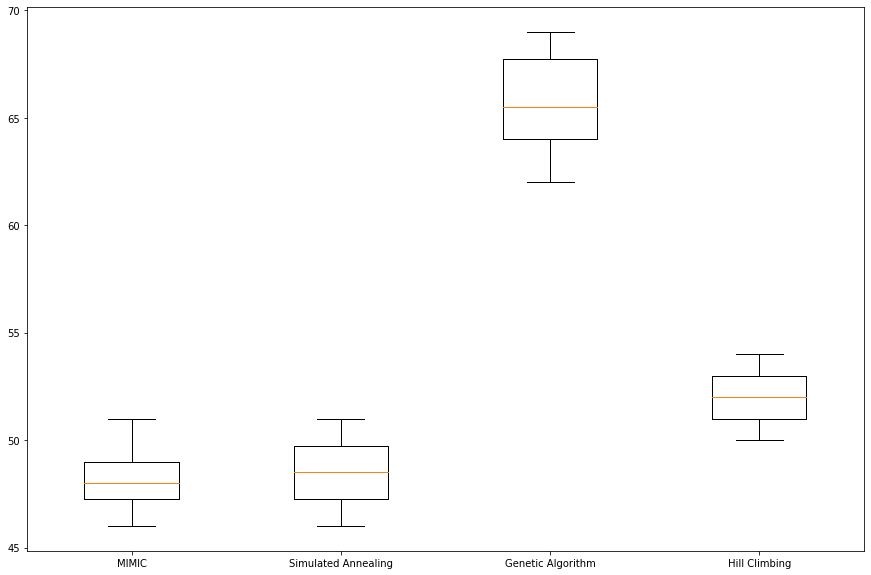

In [335]:
plt.boxplot([mim_score,ann_score, ga_score, hil_score], labels = ["MIMIC","Simulated Annealing", "Genetic Algorithm", "Hill Climbing"])
print("BoxPlot")